# Data Challenge Reader

In [1]:
import files_organizer.data_challenge_reader as dcr
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# set where your master files are
binary_star_master_path='../data/binary_star.csv'
bound_planet_master_path='../data/bound_planet.csv'
cataclysmic_variables_master_path='../data/cataclysmic_variables.csv'
single_lens_master_path='../data/single_lens.csv'

## Getting the event type of lightcurve

In [3]:
# get the type of lightcurve
lc_type = dcr.what_type_of_lightcurve(2, 
                                      binary_star_path_=binary_star_master_path,
                                      bound_planet_path_=bound_planet_master_path,
                                      cataclysmic_variables_path_=cataclysmic_variables_master_path,
                                      single_lens_path_=single_lens_master_path)

Ligthcurve 2 found on binary_star.csv file.


In [4]:
lc_type

'binary_star'

## Reading each of the four master files

In [5]:
# read the master files
binary_star_master_df = dcr.binary_star_master_reader(binary_star_master_path)
bound_planet_master_df = dcr.bound_planet_master_reader(bound_planet_master_path)
cataclysmic_variables_master_df = dcr.cataclysmic_variables_master_reader(cataclysmic_variables_master_path)
single_lens_master_df = dcr.single_lens_master_reader(single_lens_master_path)

In [6]:
# Example of one of the master files
binary_star_master_df.head()

,idx,subrun,field,l,b,ra,dec,src_id,Ds,Rs,...,flatsatFlag,flatchi2,chi2_0,chi2_1,chi2,normw,event_type,unimportant0,lc_root,data_challenge_lc_number
0,18,0,52,0.489318,-3.300210,269.959,-30.1918,3356,10.572,0.999,...,0,0,88076.6,0,348.477,2.059163,ombin,0.462222,ombin_0_52_18,2
1,2,0,88,1.110600,-0.604929,267.649,-28.2978,13758,8.368,0.212,...,0,0,510389.0,1,19601.100,5.339760,ombin,0.904826,ombin_0_88_2,6
2,13,0,33,0.182555,-1.523650,268.010,-29.5647,4661,11.684,1.370,...,0,0,95373400.0,0,13811.200,3.725754,ombin,0.243043,ombin_0_33_13,9
3,488,0,73,0.738321,-1.213380,268.028,-28.9286,18445,9.426,0.328,...,0,0,314650.0,0,88887.500,10.194825,ombin,0.760807,ombin_0_73_488,14
4,308,0,33,0.029591,-1.474420,267.871,-29.6712,4672,11.858,1.780,...,0,0,8532560.0,0,2543740.000,10.510452,ombin,0.271423,ombin_0_33_308,18


## Reading the lightcurve data

In [7]:
lightcurve_5_df = dcr.lightcurve_data_reader(data_challenge_lc_number_=5, folder_path_='../data')
lightcurve_5_df

,BJD,Magnitude,Error,days
0,2.458347e+06,20.514539,0.007972,8346.505461
1,2.458347e+06,20.515869,0.007982,8346.515987
2,2.458347e+06,20.516997,0.007990,8346.526513
3,2.458347e+06,20.510812,0.007945,8346.537040
4,2.458347e+06,20.527297,0.008066,8346.547566
...,...,...,...,...
38563,2.460059e+06,20.526572,0.008061,10059.199338
38564,2.460059e+06,20.520230,0.008014,10059.209864
38565,2.460059e+06,20.532172,0.008103,10059.220391
38566,2.460059e+06,20.523268,0.008037,10059.230917


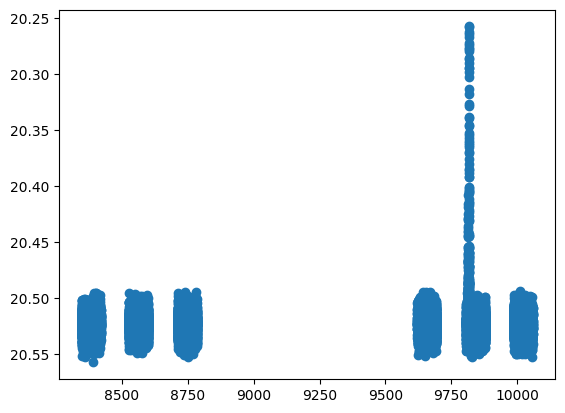

In [8]:
plt.plot(lightcurve_5_df['days'], lightcurve_5_df['Magnitude'], 'o')
plt.gca().invert_yaxis()

## Extracting values from the master file 

In [9]:
# Simple PSPL (Single-Lens) example
# LC 5 is a single lens event

lightcurve_5_master = single_lens_master_df[single_lens_master_df['data_challenge_lc_number'] == 5]
t_0 = lightcurve_5_master['t0'].values[0]
t_0 = np.nanmin(lightcurve_5_df['days']) + t_0 # correction for the minimum
t_e = lightcurve_5_master['tE'].values[0]
u_0 = lightcurve_5_master['u0'].values[0]

In [10]:
lightcurve_5_master

,idx,subrun,field,l,b,ra,dec,src_id,Ds,Rs,...,sigma_F01,sigma_fs1,sigma_thetaE,unimportant0,unimportant1,unimportant2,event_type,unimportant3,lc_root,data_challenge_lc_number
0,1694,0,82,1.17028,-2.26944,269.319,-29.0889,9926,7.939,0.212,...,76994.9,7414.03,3.440360e+09,-2.693630e+11,2.108980e+13,93.1194,dcnormffp,0.842367,dcnormffp_0_82_1694,5
